#### Ejercicio 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [7]:
#solución exacta:
def exactSolution(t,y0,lam):
    return y0/(y0 + (1-y0)*math.e**(-Lambda*t))

y0 = 0.01
Lambda = 10
Tmax = 1
#ydet = lambda t: y0/(y0 + (1-y0)*math.e**(-Lambda*t))
texacta = np.arange(0, Tmax+0.01, 0.01)
#y = ydet(t)

In [8]:
def eulerForward(Nt, y0, t, Lambda):
    """
    Requiere 4 paramétros:
    Nt(int): numero de puntos
    y0(float): valor en el punto inicial
    Tmax(float): tiempo total o tiempo maximo en segundos
    Lambda(float): parametro de la ecuacion logística"""
    
    ht = (Tmax-0)/Nt
    yes = [y0] + np.zeros(Nt).tolist()
    for i in range(0, Nt):
        yes[i+1] = yes[i]*(1 + ht*Lambda - ht*Lambda*yes[i])
    return t, yes

In [16]:
t1 = np.linspace(0, Tmax, 4+1)
y_exac1 = exactSolution(t1, y0, Lambda)
t1, y1 = eulerForward(4, 0.01, t1, 10)
error1 = np.linalg.norm(y1-y_exac1,2)

t2 = np.linspace(0, Tmax, 16+1)
y_exac2 = exactSolution(t2, y0, Lambda)
t2, y2 = eulerForward(16, 0.01, t2, 10)
error2 = np.linalg.norm(y2-y_exac2,2)

t3 = np.linspace(0, Tmax, 64+1)
y_exac3 = exactSolution(t3, y0, Lambda)
t3, y3 = eulerForward(64, 0.01, t3, 10)
error3 = np.linalg.norm(y3-y_exac3,2)

yexacta = exactSolution(texacta, y0, Lambda)

Errores = '$N_t=4$: {:3.5f}, $N_t=16$: {:3.5f}, $N_t=64$: {:3.5f}'.format(error1, error2, error3)

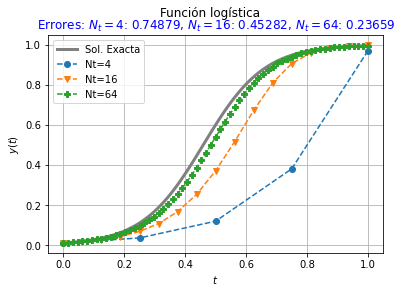

In [24]:
fig, ax1 = plt.subplots(1,1)
fig.suptitle('Función logística')
ax1.plot(texacta, yexacta, color = 'grey', linewidth=3, label = 'Sol. Exacta')
ax1.plot(t1, y1,'--o', label='Nt=4')
ax1.plot(t2, y2, '--v', label='Nt=16')
ax1.plot(t3, y3, '--P', label='Nt=64')
ax1.set_title('Errores: '+ Errores, color = 'blue')
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend()
ax1.grid()